# Looking only at images with comments at least with min_words = 50

In [1]:
from aestheval.data.datasets import AVA, Reddit, PCCD
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False, min_words=50) for split in SPLITS]
reddit_dataset = [Reddit(split, dataset_path="/media/data-storage/datasets/reddit", load_images=False, min_words=50) for split in SPLITS]
pccd_dataset = [PCCD(split, dataset_path="/media/data-storage/datasets/PCCD", load_images=False, min_words=50) for split in SPLITS]

dataset = torch.utils.data.ConcatDataset(ava_dataset + reddit_dataset + pccd_dataset)

/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
len(dataset)

132793

In [3]:
ncomments={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
nwords={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_mean_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_stdev_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
sentiment_len_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}

comments={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
for im, d in dataset:
    # print(d)
    ncomments[d['dataset_name']].append(len(d['comments']))
    nwords[d['dataset_name']].extend([len(x.split()) for x in d['comments']])
    sentiment_mean_score[d['dataset_name']].append(d['mean_score'])
    sentiment_stdev_score[d['dataset_name']].append(d['stdev_score'])
    sentiment_len_score[d['dataset_name']].append(d['number_of_scores'])
    comments[d['dataset_name']].extend(d['comments'])

count    86451.000000
mean         1.620074
std          1.162914
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: ava, dtype: float64
count    43228.000000
mean         1.635236
std          1.374279
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         56.000000
Name: reddit, dtype: float64
count    3114.000000
mean        2.552023
std         1.446783
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         7.000000
Name: pccd, dtype: float64


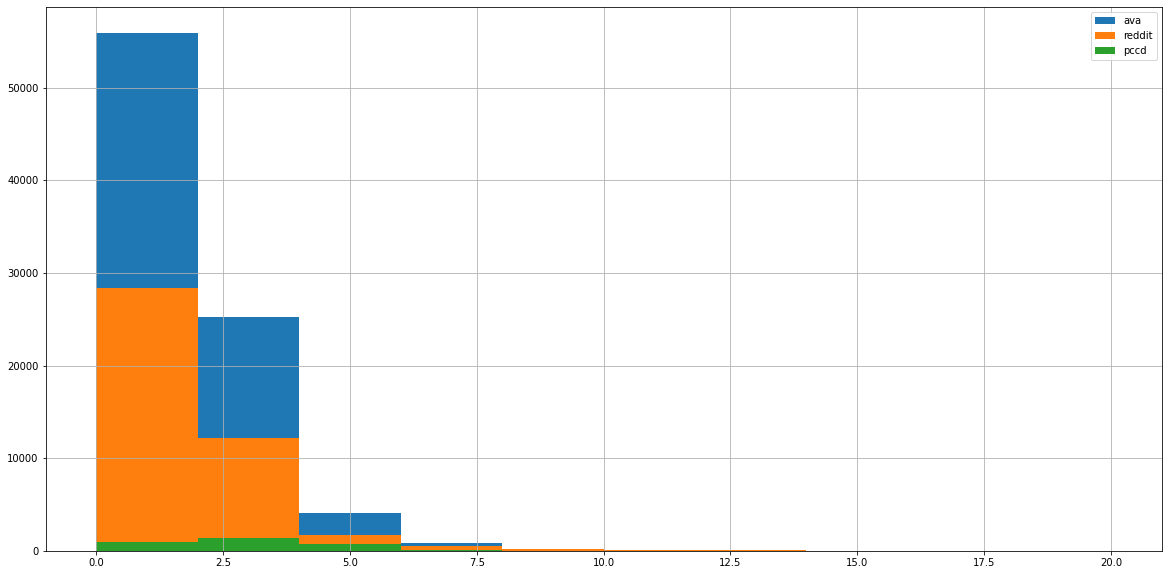

In [4]:
import pandas as pd
for name, data in ncomments.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=10, range=[0, 20], figsize=(20,10), legend=True)

count    140057.000000
mean         73.288861
std          27.520375
min          51.000000
25%          56.000000
50%          65.000000
75%          80.000000
max        2146.000000
Name: ava, dtype: float64
count    70688.000000
mean       104.165771
std         68.845629
min         51.000000
25%         63.000000
50%         82.000000
75%        119.000000
max       1286.000000
Name: reddit, dtype: float64
count    7947.000000
mean       90.557066
std        47.148144
min        51.000000
25%        61.000000
50%        75.000000
75%       103.000000
max       780.000000
Name: pccd, dtype: float64


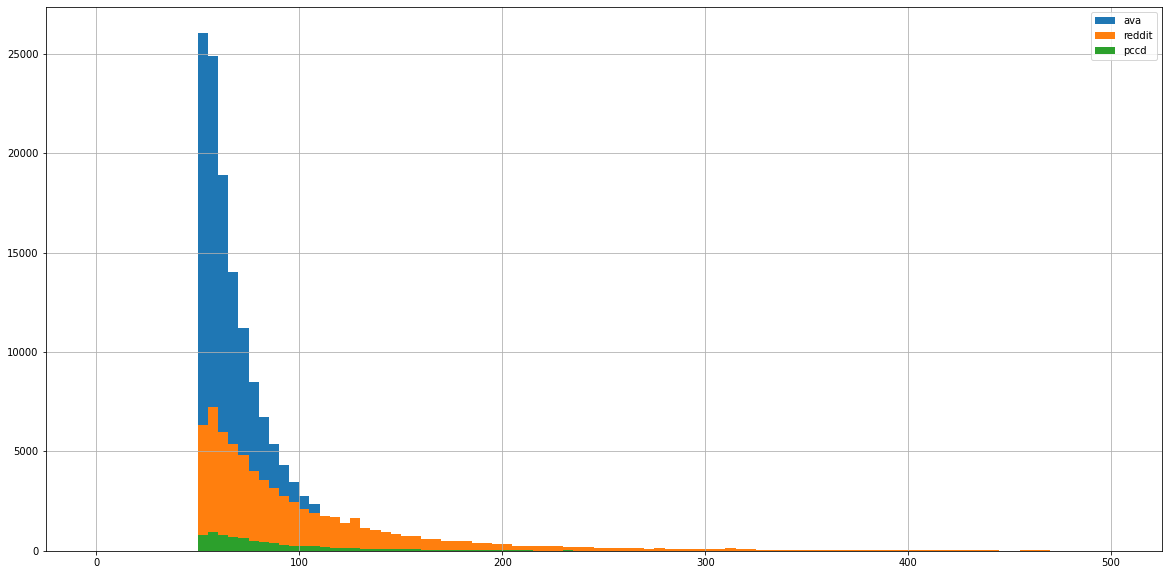

In [5]:
for name, data in nwords.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True, range=[0,500])

In [6]:
for i in range(5):
    print(dataset[i])


(None, {'im_id': '954208', 'im_score': 5.56923076923, 'query': 1396, 'im_name': '954208.jpg', 'comments': ["Underrated on the average score, but I can see from the voting breakdown and the comments, that it really did quite well. It was simply pulled down by some people who probably didn't care for the blur. Even though mine placed above yours on average, it succeeded only by getting a lot of mediocre votes and few low ones. I like your voting breakdown much better."], 'sentiment': {0: {'Negative': 0.08215358108282089, 'Neutral': 0.22259631752967834, 'Positive': 0.6952500939369202}}, 'mean_score': 0.9190642646669099, 'stdev_score': 0.10803924784994623, 'number_of_scores': 12, 'dataset_name': 'ava'})
(None, {'im_id': '953810', 'im_score': 5.6953125, 'query': 1396, 'im_name': '953810.jpg', 'comments': ["I was just thinking it was a real shame about the black line in shot along the top of the frame which I find somewhat distracting. Then I realised it was an intentional border. Can't help

count    86451.000000
mean         0.726895
std          0.156929
min          0.046791
25%          0.627058
50%          0.753641
75%          0.850390
max          0.987770
Name: ava, dtype: float64
count    43228.000000
mean         0.591360
std          0.228934
min          0.032812
25%          0.424451
50%          0.599257
75%          0.772072
max          0.991732
Name: reddit, dtype: float64
count    3114.000000
mean        0.739401
std         0.142850
min         0.108129
25%         0.656298
50%         0.760512
75%         0.847889
max         0.987247
Name: pccd, dtype: float64


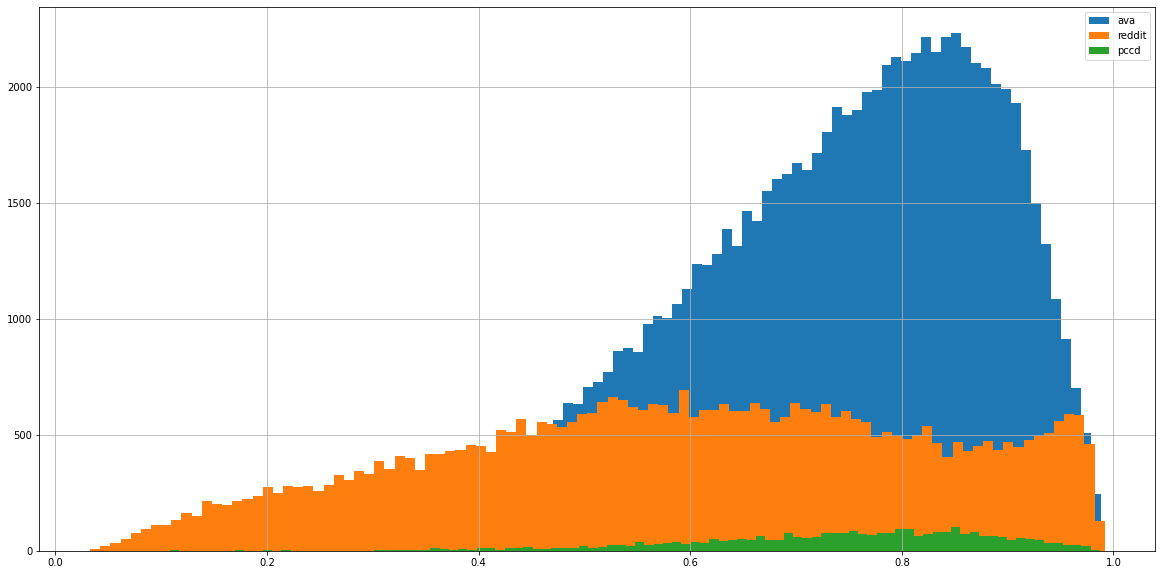

In [7]:
# Distribution of mean sentiment score per dataset

for name, data in sentiment_mean_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)



count    86451.000000
mean         0.259302
std          0.083240
min          0.000000
25%          0.211274
50%          0.269819
75%          0.316792
max          0.665165
Name: ava, dtype: float64
count    43228.000000
mean         0.174564
std          0.154537
min          0.000000
25%          0.000000
50%          0.173690
75%          0.296807
max          0.665563
Name: reddit, dtype: float64
count    3114.000000
mean        0.230445
std         0.090180
min         0.003762
25%         0.168987
50%         0.240748
75%         0.296851
max         0.466233
Name: pccd, dtype: float64


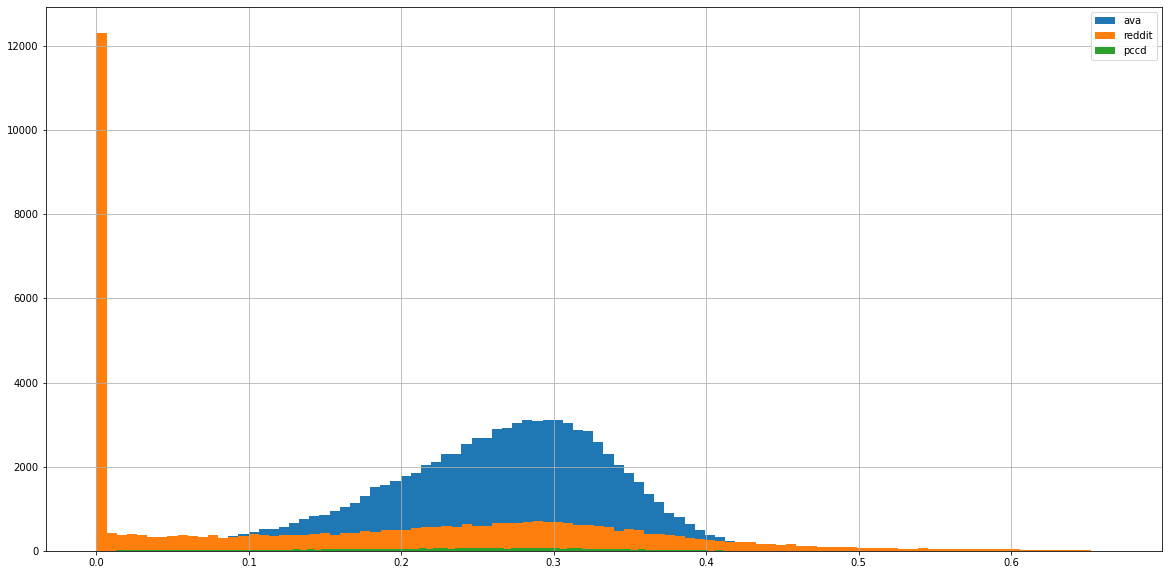

In [8]:
# Distribution of stdev sentiment score per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_stdev_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

count    86451.000000
mean        19.200368
std         17.333871
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max        367.000000
Name: ava, dtype: float64
count    43228.000000
mean         3.705908
std          4.503457
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        126.000000
Name: reddit, dtype: float64
count    3114.000000
mean        6.651252
std         0.623777
min         4.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


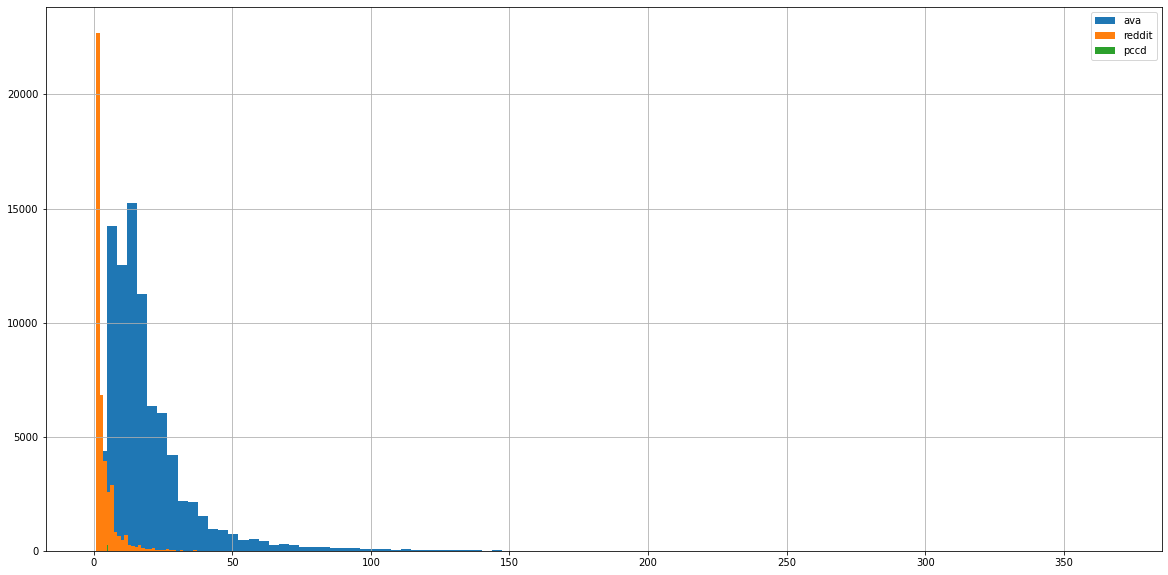

In [9]:
# Distribution of number of scores per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_len_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

# BERTopic


In [21]:
from bertopic import BERTopic
from aestheval.data.datautils.data_cleaning import clean_text
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['ava']])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [22]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,58176,-1_this_it_and_you
1,0,3159,0_tree_trees_branches_branch
2,1,3131,1_her_she_face_hair
3,2,2640,2_flower_flowers_petals_stem
4,3,2133,3_child_baby_boy_kids
...,...,...,...
621,625,10,625_recorder_music_instrument_microphone
620,626,10,626_shake_intruduced_astheticly_pastey
619,627,10,627_verry_judah_unhapy_diversity
617,623,10,623_yolk_yolks_grooves_yellow


In [23]:
topic_model.visualize_barchart(top_n_topics=24)

In [24]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['reddit']])

In [25]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,28715,-1_the_and_it_to
1,0,4767,0_her_she_face_hair
2,1,2340,1_tree_trees_branches_the
3,2,2067,2_his_him_he_hes
4,3,1138,3_bird_birds_feathers_wildlife
...,...,...,...
347,346,10,346_film_porta_interactions_400
348,347,10,347_bokeh_flower_flowers_dandelion
349,348,10,348_print_prints_printing_printed
350,349,10,349_tripod_tripods_hurting_backpack


In [26]:
topic_model.visualize_barchart(top_n_topics=24)

In [27]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['pccd']])

In [28]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,3381,-1_the_and_of_in
1,0,725,0_you_this_it_that
2,1,268,1_composition_the_subject_frame
3,2,208,2_depth_field_focus_aperture
4,3,154,3_iso_noise_speed_shutter
...,...,...,...
89,88,12,88_turtle_snail_turtles_sea
90,89,12,89_reflection_truck_reflector_rearview
91,90,12,90_building_shadows_lit_light
92,91,11,91_verticle_cropped_shot_lamp


In [29]:
topic_model.visualize_barchart(top_n_topics=24)